# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

## Sindhu Bhattarai



This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora.

In [1]:
#pip install emoji
#pip install nltk
#pip install collection

In [2]:
import nltk
# nltk.download()


In [3]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
import string
from string import punctuation

sw = stopwords.words("english")

In [4]:
# Add any additional import statements you need here


In [5]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Module_2/Tokenization-normalization-and-descriptive-statatistics"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [6]:


def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    #filled na with whitespace to work with df and making sure it will
    #not be counted on frequent words
    tokens = [token for token in tokens if token not in ['', " "]]
    # Fill in the correct values here. 
    num_tokens =  len(tokens)
    num_unique_tokens = len(set(tokens)) #len(np.unique(tokens))
    lexical_diversity =  len(set(tokens)) / len(tokens) 
    num_characters =  sum([len(i) for i in tokens]) 
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(Counter(tokens).most_common(5))

        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [7]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


**Q: Why is it beneficial to use assertion statements in your code?**

A: The assertion statements is beneficial to debug the code and check the variable are assigned correctly. 

## Data Input

**Instructions**

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [8]:
# Read in the lyrics data

def multi_dict(K, type):
    if K == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: multi_dict(K-1, type))

lyrics_defaultdict = multi_dict(2, list )
for path in os.listdir(lyrics_folder):
#     print(path)
    artist_lyrics_path = os.path.join(lyrics_folder,path)
   
    if os.path.isdir(artist_lyrics_path):
#         print(artist_lyrics_path)
        for lyrics in os.listdir(artist_lyrics_path):
#             print(lyrics)     
            current_lyrics_path = os.path.join(artist_lyrics_path, lyrics)
#             print(current_lyrics_path)
            lyrics_file = open(current_lyrics_path, "r")
            lyrics_file_content = lyrics_file.read() 
            lyrics_defaultdict[path][lyrics].append(lyrics_file_content.replace('\n', ''))
        


lyrics_defaultdict


defaultdict(<function __main__.multi_dict.<locals>.<lambda>()>,
            {'robyn': defaultdict(list,
                         {'robyn_includemeout.txt': ['"Include Me Out"It is really very simpleJust a single pulse, repeated at a regular intervalMmm, hmmDon\'t include me out, noDon\'t include me outOne time for the records and the hitsTwo for your money-maker, shake, boomThree times for the lucky and the deadOne time for the sorry and safeTwo for the beggar and his companyThree times for the sinner and the saintYeah, bow down all you wicked and the vainBow to the miracle, the em, na, naThree times and the devil will be goneOne time for the fire, bring it onTwo for the boogie, gotta bang the beatThree times for the ladies, show me some loveTalking \'bout everyone, every day, all dayAnd if your world should fall apartThere\'s plenty room inside my heartJust don\'t include me outDon\'t include me outAnd if your world should fall apartI still got room inside my heartJust don\'t include 

In [9]:
# Read in the twitter data

description_defaultdict = defaultdict(list)

for path in os.listdir(twitter_folder):
#     print(path, twitter_folder)
    
    artist_folder_path = os.path.join(twitter_folder,path)
    #print(artist_folder_path)
    openfile_to_read = open(artist_folder_path, "r")
    for line in openfile_to_read.readlines():
        current_line = (line.split('\t'))
        if(len(current_line) >= 6):
            description = current_line[6]
            description = description.strip()
            if description != 'description' and description != '':
                description_defaultdict[path.split('_')[0]].append(description)



print(description_defaultdict)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
print(description_defaultdict.keys())

dict_keys(['cher', 'robynkonichiwa'])


## Data Cleaning

**Instruction**

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



### **Cleaning the twitter description by transforming it into a dataframe**

In [11]:
#importing our dictionary into dataframe 

twitter_descriptions =  pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in description_defaultdict.items() ]))
twitter_descriptions

,cher,robynkonichiwa
0,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,"""I love chill"" •Facebook / Instagram / SoundCl..."
1,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"books, movies, music, nature & TV shows. OG Sw..."
2,csu,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...
3,Writer @Washinformer @SpelmanCollege alumna #D...,This Twitter profile is full of sarcasm and ra...
4,I’m unemployed and live with my parents. MOOPS!,Flora Youssef - Blogger & Founder Posting revi...
...,...,...
2001085,Social Media isn’t real life 🤟🏻,NaN
2001086,"Marketing Manager by day, Photographer by nigh...",NaN
2001087,I am a housewife and I'am turning 45 in Septem...,NaN
2001088,En IQ befriad brud från Strängnäs,NaN


In [12]:
# create your clean twitter data here

# #using dictionary
# def remove_punctuation(inp_str):
#     punctuation = set(string.punctuation)
#     no_punc = ""
#     for char in inp_str:
#         if char not in punctuation:
#                no_punc = no_punc + char
#     return no_punc

# cleaned_twitter_data ={}
# for artist, description in description_defaultdict.items():
#     cleaned_twitter_data[artist] = [remove_punctuation(d) for d in description]

# print(cleaned_twitter_data.get('selenagomez')[0])


In [13]:
# #using dictionary

#removing punctuations
punctuation = set(string.punctuation)

columns_toclean = ['cher', 'robynkonichiwa']
for columns_toclean in twitter_descriptions: 
    twitter_descriptions['clean'+columns_toclean] = twitter_descriptions[columns_toclean].str.replace('[{}]'.format(string.punctuation), '')

#twitter_descriptions


/Users/sakshyamdahal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [14]:
#fold to lowercase and split on whitespace
columns_toclean = ['cleancher', 'cleanrobynkonichiwa']
for columns_to_clean in twitter_descriptions[['cleancher', 'cleanrobynkonichiwa']]:
            twitter_descriptions[columns_to_clean] = twitter_descriptions[columns_to_clean].str.lower().str.split(" ")
        

#twitter_descriptions



In [15]:
#filling the na with empty spaces 
twitter_descriptions = twitter_descriptions.fillna(" ")


In [16]:
# remove stopwords
columns_toclean = ['cleancher', 'cleanrobynkonichiwa']


for columns_to_clean in twitter_descriptions[['cleancher', 'cleanrobynkonichiwa']]:
    twitter_descriptions[columns_to_clean]= twitter_descriptions[columns_to_clean].apply(lambda x: [item for item in x if item not in sw])

twitter_descriptions


,cher,robynkonichiwa,cleancher,cleanrobynkonichiwa
0,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,"""I love chill"" •Facebook / Instagram / SoundCl...","[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, , 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]","[love, chill, •facebook, , instagram, , soundc..."
1,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"books, movies, music, nature & TV shows. OG Sw...","[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]","[books, movies, music, nature, , tv, shows, og..."
2,csu,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...,[csu],"[amauteur, en, herbe, 🌱, , juriste, en, paille..."
3,Writer @Washinformer @SpelmanCollege alumna #D...,This Twitter profile is full of sarcasm and ra...,"[writer, washinformer, spelmancollege, alumna,...","[twitter, profile, full, sarcasm, rants, occas..."
4,I’m unemployed and live with my parents. MOOPS!,Flora Youssef - Blogger & Founder Posting revi...,"[i’m, unemployed, live, parents, moops]","[flora, youssef, , blogger, , founder, posting..."
...,...,...,...,...
2001085,Social Media isn’t real life 🤟🏻,,"[social, media, isn’t, real, life, 🤟🏻]",[ ]
2001086,"Marketing Manager by day, Photographer by nigh...",,"[marketing, manager, day, photographer, night,...",[ ]
2001087,I am a housewife and I'am turning 45 in Septem...,,"[housewife, iam, turning, 45, september, happe...",[ ]
2001088,En IQ befriad brud från Strängnäs,,"[en, iq, befriad, brud, från, strängnäs]",[ ]


### **Cleaning the lyrics data by transforming it into a dataframe**

In [17]:
# create your clean lyrics data here

lyrics_data =  pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in lyrics_defaultdict.items() ]))
lyrics_data


,robyn,cher
cher_88degrees.txt,NaN,"[""88 Degrees""Stuck in L.A., ain't got no frien..."
cher_adifferentkindoflovesong.txt,NaN,"[""A Different Kind Of Love Song""What if the wo..."
cher_afterall.txt,NaN,"[""After All""Well, here we are againI guess it ..."
cher_again.txt,NaN,"[""Again""Again evening finds me at your door He..."
cher_alfie.txt,NaN,"[""Alfie""What's it all about, Alfie?Is it just ..."
...,...,...
robyn_wedancetothebeat114528.txt,"[""We Dance To The Beat""We dance to the beatWe ...",NaN
robyn_wheredidourlovego.txt,"[""Where Did Our Love Go""Thoughts about you and...",NaN
robyn_whosthatgirl.txt,"[""Who's That Girl""Good girls are pretty like a...",NaN
robyn_witheveryheartbeat.txt,"[""With Every Heartbeat""Maybe we could make it ...",NaN


In [18]:
lyrics_data = lyrics_data.fillna("")
#lyrics_data

In [19]:
#removing punctuations
punctuation = set(string.punctuation)

columns_toclean = ['robyn', 'cher']

for columns_toclean in lyrics_data: 
    lyrics_data['clean'+columns_toclean] = lyrics_data[columns_toclean].astype(str).str.replace('[{}]'.format(string.punctuation), '')

    
#lyrics_data



/Users/sakshyamdahal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [20]:
#fold to lowercase and split on whitespace

columns_toclean = ['cleanrobyn', 'cleancher']
for columns_to_clean in lyrics_data[['cleanrobyn', 'cleancher']]:
            lyrics_data[columns_to_clean] = lyrics_data[columns_to_clean].str.lower().str.split(" ")

lyrics_data




,robyn,cher,cleanrobyn,cleancher
cher_88degrees.txt,,"[""88 Degrees""Stuck in L.A., ain't got no frien...",[],"[88, degreesstuck, in, la, ain\t, got, no, fri..."
cher_adifferentkindoflovesong.txt,,"[""A Different Kind Of Love Song""What if the wo...",[],"[a, different, kind, of, love, songwhat, if, t..."
cher_afterall.txt,,"[""After All""Well, here we are againI guess it ...",[],"[after, allwell, here, we, are, againi, guess,..."
cher_again.txt,,"[""Again""Again evening finds me at your door He...",[],"[againagain, evening, finds, me, at, your, doo..."
cher_alfie.txt,,"[""Alfie""What's it all about, Alfie?Is it just ...",[],"[alfiewhat\s, it, all, about, alfieis, it, jus..."
...,...,...,...,...
robyn_wedancetothebeat114528.txt,"[""We Dance To The Beat""We dance to the beatWe ...",,"[we, dance, to, the, beatwe, dance, to, the, b...",[]
robyn_wheredidourlovego.txt,"[""Where Did Our Love Go""Thoughts about you and...",,"[where, did, our, love, gothoughts, about, you...",[]
robyn_whosthatgirl.txt,"[""Who's That Girl""Good girls are pretty like a...",,"[who\s, that, girlgood, girls, are, pretty, li...",[]
robyn_witheveryheartbeat.txt,"[""With Every Heartbeat""Maybe we could make it ...",,"[with, every, heartbeatmaybe, we, could, make,...",[]


In [21]:
# remove stopwords
columns_toclean = ['cleanrobyn', 'cleancher']


for columns_to_clean in lyrics_data[['cleanrobyn', 'cleancher']]:
    lyrics_data[columns_to_clean]= lyrics_data[columns_to_clean].apply(lambda x: [item for item in x if item not in sw])

lyrics_data


,robyn,cher,cleanrobyn,cleancher
cher_88degrees.txt,,"[""88 Degrees""Stuck in L.A., ain't got no frien...",[],"[88, degreesstuck, la, ain\t, got, friends, ho..."
cher_adifferentkindoflovesong.txt,,"[""A Different Kind Of Love Song""What if the wo...",[],"[different, kind, love, songwhat, world, crazy..."
cher_afterall.txt,,"[""After All""Well, here we are againI guess it ...",[],"[allwell, againi, guess, must, fatewe\ve, trie..."
cher_again.txt,,"[""Again""Again evening finds me at your door He...",[],"[againagain, evening, finds, door, ask, could,..."
cher_alfie.txt,,"[""Alfie""What's it all about, Alfie?Is it just ...",[],"[alfiewhat\s, alfieis, moment, livewhat\s, sor..."
...,...,...,...,...
robyn_wedancetothebeat114528.txt,"[""We Dance To The Beat""We dance to the beatWe ...",,"[dance, beatwe, dance, beatwe, dance, beatwe, ...",[]
robyn_wheredidourlovego.txt,"[""Where Did Our Love Go""Thoughts about you and...",,"[love, gothoughts, thinkin\, used, belove, str...",[]
robyn_whosthatgirl.txt,"[""Who's That Girl""Good girls are pretty like a...",,"[who\s, girlgood, girls, pretty, like, timei\m...",[]
robyn_witheveryheartbeat.txt,"[""With Every Heartbeat""Maybe we could make it ...",,"[every, heartbeatmaybe, could, make, rightwe, ...",[]


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

### Descriptive Statistics for lyrics data 

In [22]:

# Extracting tokens from cleaned column for Cher
cher_cleaned = []
for i in lyrics_data['cleancher']:
    cher_cleaned.extend(i)

#Extracting tokens from cleaned column for Robyn
robyn_cleaned = []
for i in lyrics_data['cleanrobyn']:
    robyn_cleaned.extend(i)

print('Descriptive Stats of Cher in lyrics data:')
descriptive_stats(cher_cleaned)

print("\n")
print('Descriptive Stat of Robyn in lyrics data:')
descriptive_stats(robyn_cleaned)

Descriptive Stats of Cher in lyrics data:
There are 34254 tokens in the data.
There are 9111 unique tokens in the data.
There are 200927 characters in the data.
The lexical diversity is 0.266 in the data.
[('love', 689), ('know', 393), ('don\\t', 335), ('i\\m', 302), ('you\\re', 261)]


Descriptive Stat of Robyn in lyrics data:
There are 14544 tokens in the data.
There are 3866 unique tokens in the data.
There are 86563 characters in the data.
The lexical diversity is 0.266 in the data.
[('know', 260), ('got', 220), ('don\\t', 220), ('like', 195), ('love', 187)]


[14544, 3866, 0.26581408140814083, 86563]

### Descriptive Statistics for twitter description data 

In [23]:
#putting the series object of data in list for descriptive stats
cher_twitter_cleaned = []
for i in twitter_descriptions['cleancher']:
    cher_twitter_cleaned.extend(i)

#Extracting tokens from cleaned column for Robyn
robyn_twitter_cleaned = []
for i in twitter_descriptions['cleanrobynkonichiwa']:
    robyn_twitter_cleaned.extend(i)

print('Descriptive Stats of Cher follower desctription in twitter data:')
descriptive_stats(cher_twitter_cleaned)

print("\n")
print('Descriptive Stats of Robyn follower desctription in twitter data:')
descriptive_stats(robyn_twitter_cleaned)

Descriptive Stats of Cher follower desctription in twitter data:
There are 15671547 tokens in the data.
There are 1518213 unique tokens in the data.
There are 92955687 characters in the data.
The lexical diversity is 0.097 in the data.
[('love', 214574), ('im', 139096), ('life', 122980), ('music', 88174), ('de', 72974)]


Descriptive Stats of Robyn follower desctription in twitter data:
There are 1495672 tokens in the data.
There are 252792 unique tokens in the data.
There are 9128332 characters in the data.
The lexical diversity is 0.169 in the data.
[('music', 15146), ('love', 11677), ('im', 9051), ('och', 7922), ('life', 7383)]


[1495672, 252792, 0.16901566653651334, 9128332]

**Q: How do you think the "top 5 words" would be different if we left stopwords in the data?** 

A: There can be the possibility of getting stop words as "top 5 words" if we have left stopwords in the data. 

**Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?**

A: My prior brlief of lexical diversity between the artists was the occurance of words in the lyrics of the artists. I just had the rough understanding of lexical diversity which somewhat matched the concept I learned but I know more in depth about the comparisiona nd process now. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [24]:
def is_emoji(s):
    return(emoji.is_emoji(s))

assert(is_emoji("❤️"))
assert(not is_emoji(":-)"))

### Emojis 😁

**What are the ten most common emojis by artist in the twitter descriptions? **


In [25]:
#Define Emojis function

# Cher's Twitter 
cher_emojis = []
for i in twitter_descriptions['cleancher']:
    for token in i:
        if emoji.is_emoji(token):
            cher_emojis.append(token)

cher_emo_count = Counter(cher_emojis)
print('Top Ten Emojis for Cher')
print(cher_emo_count.most_common(10))


#Robyn's Twitter
robyn_emojis = []
for i in twitter_descriptions['cleanrobynkonichiwa']:
    for token in i:
        if emoji.is_emoji(token):
            robyn_emojis.append(token)

robyn_emo_count = Counter(robyn_emojis)
print('Top Ten Emojis for Robyn')
print(robyn_emo_count.most_common(10))

Top Ten Emojis for Cher
[('❤️', 14719), ('🏳️\u200d🌈', 14147), ('♥', 10154), ('❤', 9660), ('✨', 8344), ('🌈', 5483), ('🇺🇸', 3699), ('💙', 3685), ('💜', 3499), ('🌊', 3291)]
Top Ten Emojis for Robyn
[('🏳️\u200d🌈', 1703), ('♥', 1166), ('❤️', 987), ('✨', 751), ('❤', 653), ('🌈', 570), ('🎶', 272), ('🎧', 213), ('🖤', 212), ('💜', 205)]


### Hashtags

**What are the ten most common hashtags by artist in the twitter descriptions?**

In [26]:
# Your code here

#hastags 
def analyze(posts):
    tag = {}
    for sentence in posts:
        words = sentence.split(' ')
        for word in words:
            
            if word.startswith('#'):
                if word[1:] in tag.keys():
                    tag[word[1:]] += 1
                else:
                    tag[word[1:]] = 1
    return(tag)

# Cher's Twitter 
cher_hastag = analyze(twitter_descriptions['cher'])

cher_hastag_count = Counter(cher_hastag)
print('Top Ten hastags  for cher')
print(cher_hastag_count.most_common(10))


#Robyn's Twitter
robyn_hastag = analyze(twitter_descriptions['robynkonichiwa'])

robyn_hastag_count = Counter(robyn_hastag)
print('Top Ten hastags  for Robyn')
print(robyn_hastag_count.most_common(10))


Top Ten hastags  for cher
[('BLM', 7919), ('Resist', 5007), ('BlackLivesMatter', 4226), ('resist', 3133), ('FBR', 2767), ('blacklivesmatter', 2464), ('TheResistance', 2459), ('1', 2226), ('', 1965), ('Resistance', 1518)]
Top Ten hastags  for Robyn
[('BlackLivesMatter', 311), ('BLM', 273), ('blacklivesmatter', 200), ('1', 187), ('music', 150), ('', 150), ('Music', 93), ('EDM', 79), ('blm', 51), ('TeamFollowBack', 51)]


### Song Titles

**What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.**


In [27]:
# Your code here
import re

for artist in lyrics_defaultdict.keys():
    song_title = []
    for lyrics_titile in lyrics_defaultdict.get(artist).keys():
       
        for values in lyrics_defaultdict.get(artist).get(lyrics_titile):
            song_title += (re.findall(r'"(.*?)"', values)[0].split(' '))
    

    song_title_count = Counter(song_title)
    print('Five most common words in song title for {}'.format(artist))
    print(song_title_count.most_common(5))

            


Five most common words in song title for robyn
[('Me', 11), ('You', 8), ('The', 8), ('My', 8), ('Love', 6)]
Five most common words in song title for cher
[('The', 53), ('You', 40), ('Love', 38), ('I', 32), ('To', 28)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

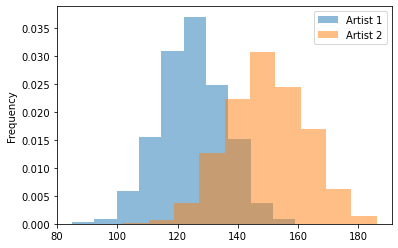

In [28]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df
df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

**Q: What does the regular expression `'\s+'` match on?**

A: \s matches any whitespace characters and split on whitespace


In [29]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

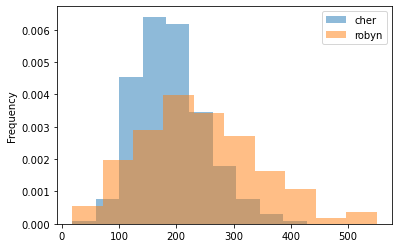

In [30]:
# Your lyric length comparison chart here. 
artist_lst = []
length_lst = []

for artist in lyrics_defaultdict.keys():
    for lyrics_titile in lyrics_defaultdict.get(artist).keys():
        for values in lyrics_defaultdict.get(artist).get(lyrics_titile):
            length = len(tokenize_lyrics(values))
            artist_lst.append(artist)
            length_lst.append(length)

d = {'artist': artist_lst, 'length': length_lst}
df = pd.DataFrame(data=d)
df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)